In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import os
import sys

sys.path.append("../../../")
from src.athena import Athena
from src.utils import create_session

## Global

In [3]:
boto3_session = create_session(
    profile_name="dev",
    role_arn=os.getenv("ATHENA_IAM_ROLE_ARN"),
)

wait = True
ctas_approach = False

database = "data_mart"
tables = ["weekly_sales"]
sql_path = "../sql/"

athena = Athena(boto3_session=boto3_session, s3_output=os.getenv("ATHENA_S3_OUTPUT"))
athena

Athena(boto3_session=Session(region_name='us-east-1'), s3_output=s3://sql-case-studies/query_results)

## Problem Statement

Data Mart is an international supermarket specializing in fresh produce, operating through both retail and online platforms using a multi-region strategy. In June 2020, the company introduced sustainability-driven changes by implementing sustainable packaging methods across all products and stages of operation, from production to delivery.  

The objective of this analysis is to evaluate the impact of these changes on sales performance and address the following key questions:  

1. What was the quantifiable impact of the sustainable packaging initiative on overall sales performance?  
2. Which platform, region, segment, and customer type experienced the most significant impact from the changes?  
3. What strategies can be implemented to minimize potential negative effects on sales when introducing similar sustainability updates in the future?  

The analysis will utilize the available dataset, `data_mart.weekly_sales`, to generate actionable insights and recommendations.

## Entity Relationship Diagram

<center>
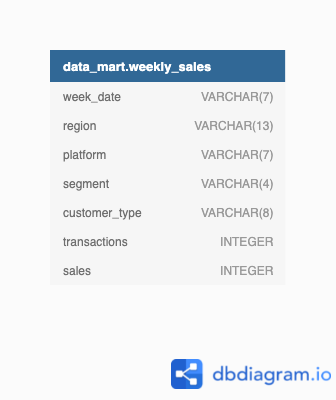
</center>

### Weekly Sales

* **week_date**: The starting date of the sales week for each record.  

* **region**: Represents the geographical area of operations within Data Mart's multi-region strategy.  

* **platform**: Indicates whether sales occurred through the retail channel or the online Shopify storefront.  

* **customer_segment**: Categorizes customers based on demographic and age-related groupings.  

* **customer_type**: Provides additional demographic details, such as lifestyle or purchasing behavior.  

* **transactions**: The count of unique purchases made during the corresponding sales week.  

* **sales**: The total dollar amount of purchases made in the corresponding sales week.  

## Tables

In [6]:
for table in tables:
    athena.query(
        database=database,
        query=f""" 
                SELECT
                    *
                FROM
                    {database}.{table} TABLESAMPLE BERNOULLI(30);
              """,
        ctas_approach=ctas_approach,
    )

,week_date,region,platform,segment,customer_type,transactions,sales
0,2020-08-31,AFRICA,Retail,C2,New,58046,1758388.0
1,2020-08-31,CANADA,Shopify,F2,Existing,1336,243878.0
2,2020-08-31,AFRICA,Shopify,F3,Existing,2514,519502.0
3,2020-08-31,AFRICA,Retail,F1,Existing,97604,5185233.0
4,2020-08-31,OCEANIA,Retail,C2,New,111219,2980673.0
...,...,...,...,...,...,...,...
5118,2018-03-26,SOUTH AMERICA,Shopify,F2,New,6,873.0
5119,2018-03-26,USA,Shopify,F3,Existing,752,168817.0
5120,2018-03-26,ASIA,Shopify,<NA>,Guest,2091,336688.0
5121,2018-03-26,ASIA,Retail,F3,New,81842,2673553.0
